In [ ]:
regras = '''
O Inglês vive na casa Vermelha.
O Sueco tem Cachorros como animais de estimação.
O Dinamarquês bebe Chá.
A casa Verde fica do lado esquerdo da casa Branca.
O homem que vive na casa Verde bebe Café.
O homem que fuma Pall Mall cria Pássaros.
O homem que vive na casa Amarela fuma Dunhill.
O homem que vive na casa do meio bebe Leite.
O Norueguês vive na primeira casa.
O homem que fuma Blends vive ao lado do que tem Gatos.
O homem que cria Cavalos vive ao lado do que fuma Dunhill.
O homem que fuma Blue Master bebe Cerveja.
O Alemão fuma Prince.
O Norueguês vive ao lado da casa Azul.
O homem que fuma Blends é vizinho do que bebe Água.
'''

In [ ]:
cores = []
nacionalidades = []
bebidas = []
cigarros = []
animais = []

In [ ]:
!pip install openai

In [ ]:
import openai

api_key = 'SUA CHAVE OPENAI'

client = openai.OpenAI(api_key=api_key)

prompt_instruct = '''
Dadas as regras a seguir, extraia em listas python separadas:
cores, nacionalidades, bebidas, cigarros e animais
'''

completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  temperature = 0.01,
  messages=[
    {"role": "system", "content": prompt_instruct},
    {"role": "user", "content": regras}
  ]
)

print(completion.choices[0].message.content)

cores = ['Vermelha', 'Verde', 'Branca', 'Amarela', 'Azul']
nacionalidades = ['Inglês', 'Sueco', 'Dinamarquês', 'Norueguês', 'Alemão']
bebidas = ['Chá', 'Café', 'Leite', 'Cerveja', 'Água']
cigarros = ['Pall Mall', 'Dunhill', 'Blends', 'Blue Master', 'Prince']
animais = ['Cachorros', 'Pássaros', 'Gatos', 'Cavalos']


In [ ]:
exec(completion.choices[0].message.content)

In [ ]:
from constraint import *
qi_einstein = Problem()

criterios = cores+nacionalidades+bebidas+cigarros+animais
qi_einstein.addVariables(criterios,[1,2,3,4,5])

In [ ]:
qi_einstein.addConstraint(AllDifferentConstraint(), cores)
qi_einstein.addConstraint(AllDifferentConstraint(), nacionalidades)
qi_einstein.addConstraint(AllDifferentConstraint(), bebidas)
qi_einstein.addConstraint(AllDifferentConstraint(), cigarros)
qi_einstein.addConstraint(AllDifferentConstraint(), animais)

In [ ]:
qi_einstein.getSolver()

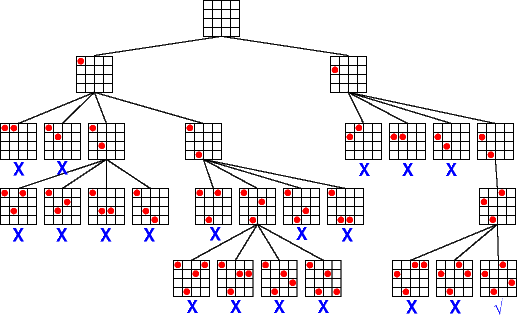

In [ ]:
def retorna_constrain_func(frase):
  prompt_instruct = '''
  Dada a frase a seguir, extraia em uma lista apenas
  a cor, nacionalidade, animal, cigarro e bebida.
  Extraia apenas as palavras que iniciem com maiúsculo
  E com mais de uma letra.
  Atenção para palavras compostas.
  '''
  completion = client.chat.completions.create(
  temperature=0.1,
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": prompt_instruct},
    {"role": "user", "content": frase}
  ]
  )

  #print(completion.choices[0].message.content)
  return eval(completion.choices[0].message.content)

In [ ]:
def retorna_posicao_variavel(frase):
  prompt_instruct = '''
  A posição é respectiva a 1 ou 2 ou 3 ou 4 ou 5.
  Converta para numérico a posição.
  Extraia a entidade principal que possua letra maiúscula.}
  Retorne a [posição,"Entidade"]
  '''
  completion = client.chat.completions.create(
  temperature=0.01,
  model="gpt-3.5-turbo",
  messages=[
  {"role": "system", "content": prompt_instruct},
  {"role": "user", "content": frase}
  ]
  )

  # print(completion.choices[0].message.content)
  # eval para retornar uma lista
  return eval(completion.choices[0].message.content)

In [ ]:
restricoes_modelo = []
for regra in regras.split('\n'):
  if regra != '':
    lista = retorna_constrain_func(regra)
    #checa se diz a localização exata da variável
    if len(lista) == 1:
      posicao_variavel = retorna_posicao_variavel(regra)
      restricao = f"qi_einstein.addConstraint(InSetConstraint([{posicao_variavel[0]}]), \
                  ['{posicao_variavel[1]}'])"
    else:
      if 'esquerdo' in regra:
        restricao = f'qi_einstein.addConstraint(lambda x, y: x-y == 1, {lista})'
      elif 'ao lado' in regra or 'vizinho' in regra:
        restricao = f'qi_einstein.addConstraint(lambda x, y: abs(x-y) == 1, {lista})'
      else:
        restricao = f'qi_einstein.addConstraint(lambda x, y: x==y, {lista})'
    print(restricao)
    restricoes_modelo.append(restricao)

qi_einstein.addConstraint(lambda x, y: x==y, ['Vermelha', 'Inglês'])
qi_einstein.addConstraint(lambda x, y: x==y, ['Sueco', 'Cachorros'])
qi_einstein.addConstraint(lambda x, y: x==y, ['Dinamarquês', 'Chá'])
qi_einstein.addConstraint(lambda x, y: x-y == 1, ['Verde', 'Branca'])
qi_einstein.addConstraint(lambda x, y: x==y, ['Verde', 'Café'])
qi_einstein.addConstraint(lambda x, y: x==y, ['Pall Mall', 'Pássaros'])
qi_einstein.addConstraint(lambda x, y: x==y, ['Amarela', 'Dunhill'])
qi_einstein.addConstraint(InSetConstraint([3]), ['Leite'])
qi_einstein.addConstraint(InSetConstraint([1]), ['Norueguês'])
qi_einstein.addConstraint(lambda x, y: abs(x-y) == 1, ['Blends', 'Gatos'])
qi_einstein.addConstraint(lambda x, y: abs(x-y) == 1, ['Cavalos', 'Dunhill'])
qi_einstein.addConstraint(lambda x, y: x==y, ['Blue Master', 'Cerveja'])
qi_einstein.addConstraint(lambda x, y: x==y, ['Alemão', 'Prince'])
qi_einstein.addConstraint(lambda x, y: abs(x-y) == 1, ['Norueguês', 'Azul'])
qi_einstein.addConstraint(

In [ ]:
# qi_einstein.addConstraint(lambda x, y: x == y, ["Inglês","Vermelha"])
# qi_einstein.addConstraint(lambda x, y: x == y, ("Sueco","Cachorros"))
# qi_einstein.addConstraint(lambda x, y: x == y, ("Dinamarquês","Chá"))
# qi_einstein.addConstraint(lambda x, y: x == y, ("Verde","Café"))
# qi_einstein.addConstraint(lambda x, y: x-y == 1, ("Verde","Branca"))
# qi_einstein.addConstraint(lambda x, y: x == y, ("Pall Mall","Pássaros"))
# qi_einstein.addConstraint(lambda x, y: x == y, ("Amarela","Dunhill"))
# qi_einstein.addConstraint(InSetConstraint([3]), ["Leite"])
# qi_einstein.addConstraint(InSetConstraint([1]), ["Norueguês"])
# qi_einstein.addConstraint(lambda x, y: abs(x-y) == 1, ("Blends","Gatos"))
# qi_einstein.addConstraint(lambda x, y: abs(x-y) == 1, ("Cavalos","Dunhill"))
# qi_einstein.addConstraint(lambda x, y: x == y, ["Blue Master","Cerveja"])
# qi_einstein.addConstraint(lambda x, y: x == y, ["Alemão","Prince"])
# qi_einstein.addConstraint(lambda x, y: abs(x-y) == 1, ("Norueguês","Azul"))
# qi_einstein.addConstraint(lambda x, y: abs(x-y) == 1, ("Blends","Água"))

for restricao in restricoes_modelo:
  print(restricao)
  exec(restricao)

qi_einstein.addConstraint(lambda x, y: x==y, ['Vermelha', 'Inglês'])
qi_einstein.addConstraint(lambda x, y: x==y, ['Sueco', 'Cachorros'])
qi_einstein.addConstraint(lambda x, y: x==y, ['Dinamarquês', 'Chá'])
qi_einstein.addConstraint(lambda x, y: x-y == 1, ['Verde', 'Branca'])
qi_einstein.addConstraint(lambda x, y: x==y, ['Verde', 'Café'])
qi_einstein.addConstraint(lambda x, y: x==y, ['Pall Mall', 'Pássaros'])
qi_einstein.addConstraint(lambda x, y: x==y, ['Amarela', 'Dunhill'])
qi_einstein.addConstraint(InSetConstraint([3]), ['Leite'])
qi_einstein.addConstraint(InSetConstraint([1]), ['Norueguês'])
qi_einstein.addConstraint(lambda x, y: abs(x-y) == 1, ['Blends', 'Gatos'])
qi_einstein.addConstraint(lambda x, y: abs(x-y) == 1, ['Cavalos', 'Dunhill'])
qi_einstein.addConstraint(lambda x, y: x==y, ['Blue Master', 'Cerveja'])
qi_einstein.addConstraint(lambda x, y: x==y, ['Alemão', 'Prince'])
qi_einstein.addConstraint(lambda x, y: abs(x-y) == 1, ['Norueguês', 'Azul'])
qi_einstein.addConstraint(

In [ ]:
solucoes = qi_einstein.getSolutions()[0]

In [ ]:
dict(sorted(solucoes.items(), key=lambda x: x[1]))

{'Dunhill': 1,
 'Amarela': 1,
 'Norueguês': 1,
 'Gatos': 1,
 'Água': 1,
 'Blends': 2,
 'Cavalos': 2,
 'Azul': 2,
 'Dinamarquês': 2,
 'Chá': 2,
 'Vermelha': 3,
 'Inglês': 3,
 'Pall Mall': 3,
 'Pássaros': 3,
 'Leite': 3,
 'Branca': 4,
 'Blue Master': 4,
 'Cerveja': 4,
 'Cachorros': 4,
 'Sueco': 4,
 'Verde': 5,
 'Café': 5,
 'Alemão': 5,
 'Prince': 5}

SPOILER ALERT!!!
.
.
.
.
.
.
.
.
.
.
.
..
.
.
.
.
.
.
.
.
.
.
..


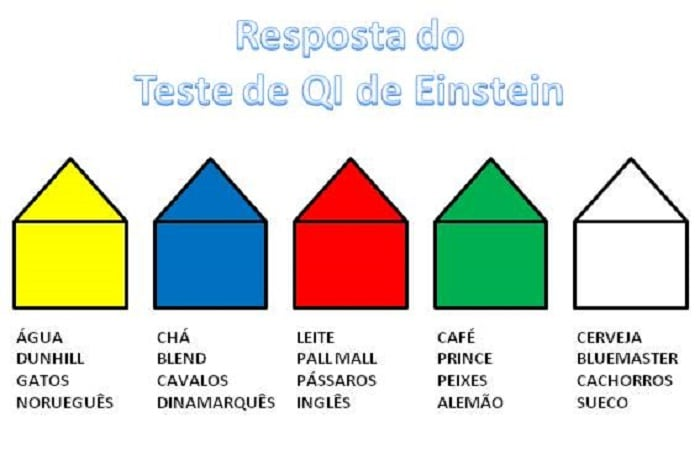